<a href="https://colab.research.google.com/github/PhamBaVuong/DataAnalysisDeepLearning/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
# để chọn ngẫu nhiên các tấm ảnh
import random
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-255, 0 là màu đen và 255 là màu trắng sáng nhất
# các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28
print("x_train shape",x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


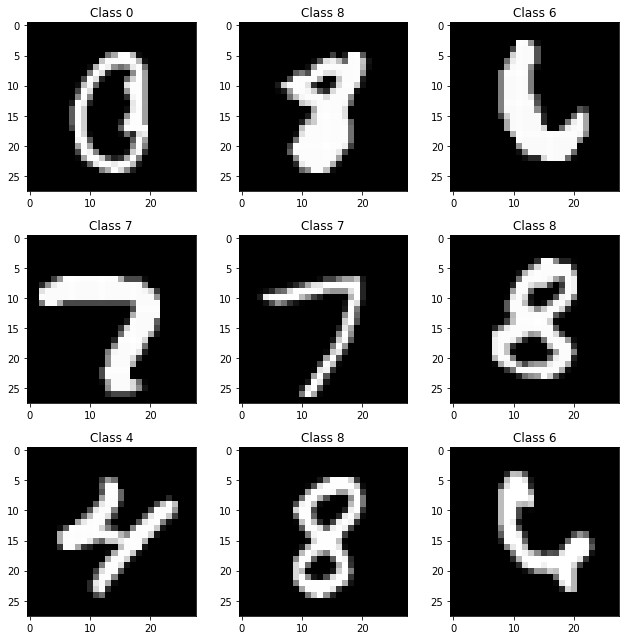

In [ ]:
# nếu muốn hiển thị ngẫu nhiên các tấm ảnh trong tập train thì dùng hàm sau
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

In [ ]:
# thay đổi kích thước đầu vào chuyển đầu vào của mỗi tấm ảnh về dạng vector, 
# vì tập dữ liệu mnist được lưu ở dạng 
# ma trận 2 chiều gồm 28 dòng và 28 cột
# trước khi truyền vào mạng neural cần chuyển sang dạng vector. Nếu dùng mạng CNN thì ko cần chuyển
# mạng CNN các sv tự tìm hiểu thêm
# 784= 28*28
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

# sau khi chuẩn hóa xong muốn xem lại tập train thì cùng hàm print
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# tương tự đối với tập train,tập test chỉ gồm 10000 tấm ảnh
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

# sau khi chuẩn hóa xong muốn xem lại tập test thì cùng hàm print
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# vì đầu ra của mạng neural là nhận dạng 1 tấm ảnh thuộc 1 trong các lớp 0-9, nên ta dùng hàm này để 
# gán các giá trị kết quả cho tập y_test
# ví dụ tấm ảnh là số 2 thì y_test ứng với tấm đó là:
# [[0. 0. 1. ... 0. 0. 0.]]
# giá trị ở vị trí số 2 là 1, các giá trị còn lại là 0
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

In [ ]:
model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))

In [ ]:
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))

In [ ]:
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
# Với các bài toán classification (phân loại) thì nếu có 2 lớp thì hàm activation ở output layer là hàm sigmoid, 
# còn nhiều hơn 2 lớp thì hàm activation ở ouput layer là hàm softmax
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
______________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
history = model.fit(x_train,y_train,batch_size=128,epochs=5)

# dự báo mô hình, giá trị dự báo được lưu vào biến predicted_classes
# giá trị thực tế được lưu ở tập t_test
predicted_classes=model.predict(x_test)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6673 - accuracy: 0.8075
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.9078
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9233
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2369 - accuracy: 0.9311
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2211 - accuracy: 0.9360


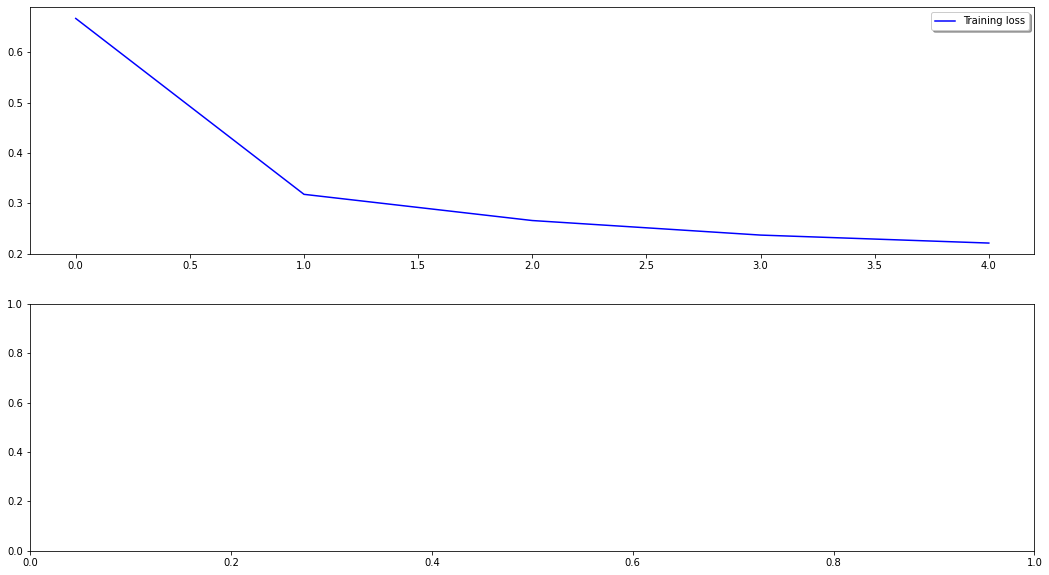

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

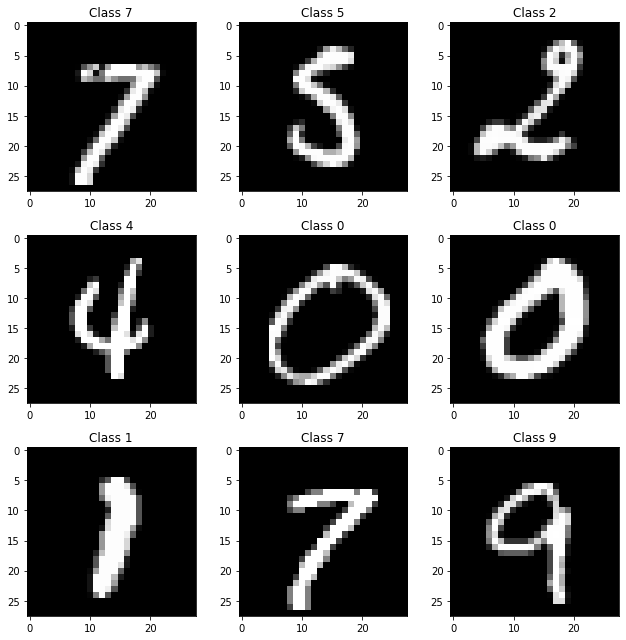

In [ ]:
# hiển thị 9 tấm ảnh ngẫu nhiên trong tập test
# hiển thị kết quả dự báo của 9 tấm ảnh này theo mô hình neural vừa xây dựng
# vì hàm imshow để hiển thị tấm ảnh dạng 28*28, vì ta đã reshape tấm ảnh thành dạng vector ở bước trước
# nên bây giờ muốn hiển thị tấm ảnh cho tập dữ liệu đã reshape, ta lại dùng hàm reshape để về dạng ban đầu
# vì hàm softmax dùng ở mạng neural ở lớp output là hàm tính xác suất, nên xác suất rơi vào lớp nào nhiều nhất thì output sẽ ra giá trị đó.
# muốn xuất kết quả dự báo, ta dùng hàm argmax()
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()  

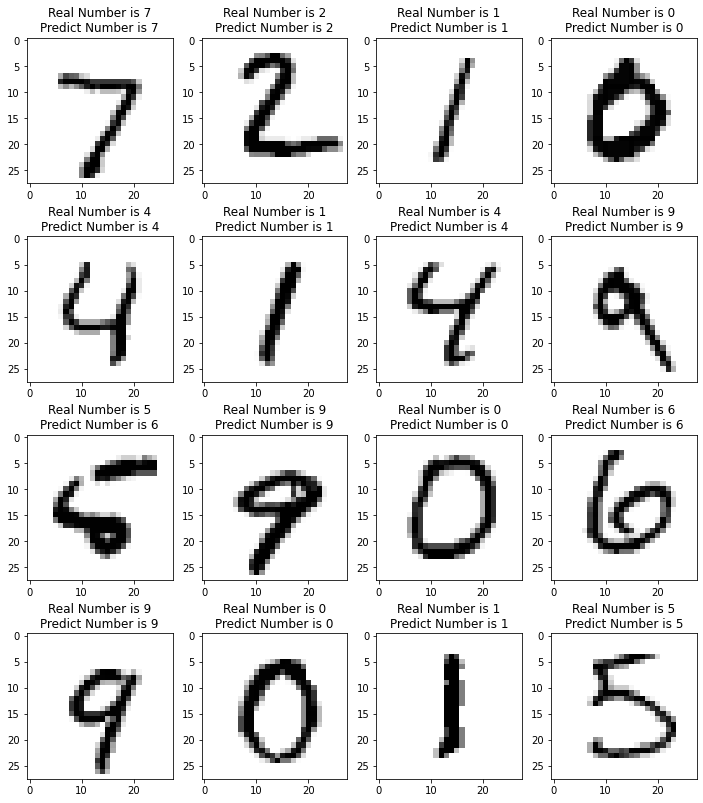

In [ ]:
y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

x_train shape: (60000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_____________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


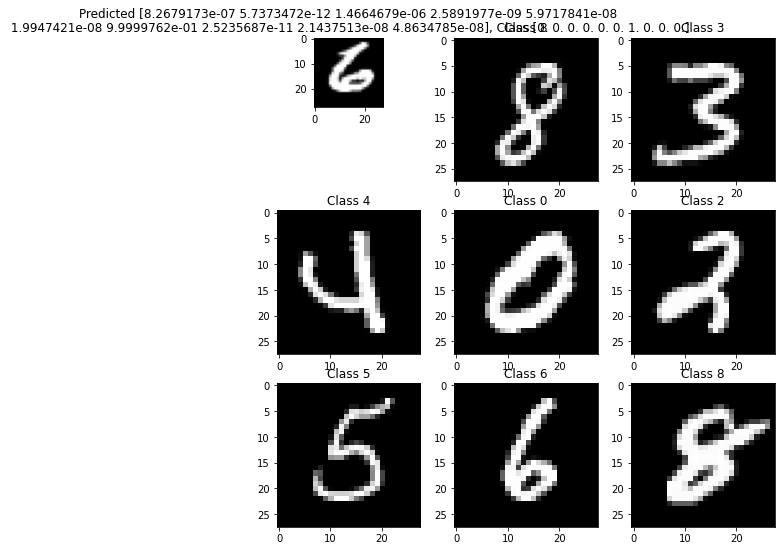

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation

# xây dựng mô hình mạng nơ ron để nhận dạng chữ viết tay
# tập dữ liệu huấn luyện và tập test được load từ hàm load_data
# x là dữ liệu của bức ảnh, y là kết quả của bức ảnh đó là chữ số mấy

# x: đầu vào (tấm ảnh)
# y: đầu ra (trả lời)
(x_train, y_train), (x_test, y_test) =  mnist.load_data()
print ('x_train shape:', x_train.shape) # in kích thước của x_train (60000 tấm ảnh 28x28 pixels)
# kết quả là có 60000 tấm ảnh, mỗi tấm ảnh có kích thước 28*28 pixels
plt.rcParams['figure.figsize'] = (9, 9)
# in 9 hình
for i in range(9):
  plt.subplot(3, 3, i + 1) # 3 dòng 3 cột
  num = random.randint(0, len(x_train)) # chọn vị trí random trong dữ liệu
  plt.imshow(x_train[num], cmap = 'gray', interpolation = None) # in random ảnh
  plt.title('Class {}'.format(y_train[num])) # in ra ảnh là số mấy

# mỗi pixel có giá trị từ 0 đến 254, 0 là màu đen, 255 là màu sáng nhất 
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float')
x_train /= 255

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float')
x_test /= 255

nb_class = 10 

y_train = np_utils.to_categorical(y_train, nb_class)
y_test = np_utils.to_categorical(y_test, nb_class)

# add vào lớp input 10 nơ ron
model = Sequential()
model.add(Dense(10, input_shape = (784,)))
model.add(Activation('relu'))

# add vào lớp hiden
model.add(Dense(20))
model.add(Activation('relu'))

# add vào lớp output, bắt buộc 10 nơ ron
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs = 5)

# theo mô hình thì ra kết quả là predict_class
# theo tập test thì ra kết quả là y_test
# có 1 tấm ảnh là x_test, thì y_test là kết quả của tấm ảnh (kết quả thực tế), dựa vào máy huấn luyện
# có 1 tấm ảnh x_test, đưa vô mô hình để dự báo thì kết quả lưu ở tập predicted_class
# lấy mô hình đã xây dựng đi dự báo

predicted_classes = model.predict(x_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print ('classified correctly', len(correct_indices))
print ('classified incorrectly', len(incorrect_indices))

for i in correct_indices:
  dem = 1
  plt.subplot(6, 3, dem)
  plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray', interpolation = None)
  plt.title('Predicted {}, Class {}'.format(predicted_classes[i], y_test[i]))
  dem += 1

for i in incorrect_indices:
  dem = 1
  plt.subplot(6, 3, dem)
  plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray', interpolation = None)
  plt.title('Predicted {}, Class {}'.format(predicted_classes[i], y_test[i]))
  dem += 1
